In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [ ]:
datasets = pd.read_csv('Dataset.csv') 
print(datasets)

     Outlook  Temp   Wind Humidity Class
0      Rainy   Hot  False     High    No
1      Rainy   Hot   True     High    No
2   Overcast   Hot  False     High   Yes
3      Sunny  Mild  False     High   Yes
4      Sunny  Cool  False   Normal   Yes
5      Sunny  Cool   True   Normal    No
6   Overcast  Cool   True   Normal   Yes
7      Rainy  Mild  False     High    No
8      Rainy  Cool  False   Normal   Yes
9      Sunny  Mild  False   Normal   Yes
10     Rainy  Mild   True   Normal   Yes
11  Overcast  Mild   True     High   Yes
12  Overcast   Hot  False   Normal   Yes
13     Sunny  Mild   True     High    No


In [ ]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.Outlook.values.reshape(-1,1)).toarray()
y = onehotencoder.fit_transform(datasets.Temp.values.reshape(-1,1)).toarray()
z = onehotencoder.fit_transform(datasets.Wind.values.reshape(-1,1)).toarray()
w = onehotencoder.fit_transform(datasets.Humidity.values.reshape(-1,1)).toarray()

In [ ]:
#R-1,O-0,S-2
x

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
#H-1,M-0,C-2
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#F-0,T-1
z

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
#High-0,Normal-1
w

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
dfOneHot = pd.DataFrame(x, columns = ["Outlook_"+str(int(i)) for i in range(datasets.shape[1]-2)]) 
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['Outlook'], axis=1) 
#printing to verify 
print(df)
datasets = df

    Temp   Wind Humidity Class  Outlook_0  Outlook_1  Outlook_2
0    Hot  False     High    No        0.0        1.0        0.0
1    Hot   True     High    No        0.0        1.0        0.0
2    Hot  False     High   Yes        1.0        0.0        0.0
3   Mild  False     High   Yes        0.0        0.0        1.0
4   Cool  False   Normal   Yes        0.0        0.0        1.0
5   Cool   True   Normal    No        0.0        0.0        1.0
6   Cool   True   Normal   Yes        1.0        0.0        0.0
7   Mild  False     High    No        0.0        1.0        0.0
8   Cool  False   Normal   Yes        0.0        1.0        0.0
9   Mild  False   Normal   Yes        0.0        0.0        1.0
10  Mild   True   Normal   Yes        0.0        1.0        0.0
11  Mild   True     High   Yes        1.0        0.0        0.0
12   Hot  False   Normal   Yes        1.0        0.0        0.0
13  Mild   True     High    No        0.0        0.0        1.0


In [ ]:
dfOneHot1 = pd.DataFrame(y, columns = ["Temp_"+str(int(i)) for i in range(df.shape[1]-4)]) 
df = pd.concat([df, dfOneHot1], axis=1) #column
#droping the country column 
df= df.drop(['Temp'], axis=1) 
#printing to verify 
print(df)
datasets = df

     Wind Humidity Class  Outlook_0  ...  Outlook_2  Temp_0  Temp_1  Temp_2
0   False     High    No        0.0  ...        0.0     0.0     1.0     0.0
1    True     High    No        0.0  ...        0.0     0.0     1.0     0.0
2   False     High   Yes        1.0  ...        0.0     0.0     1.0     0.0
3   False     High   Yes        0.0  ...        1.0     0.0     0.0     1.0
4   False   Normal   Yes        0.0  ...        1.0     1.0     0.0     0.0
5    True   Normal    No        0.0  ...        1.0     1.0     0.0     0.0
6    True   Normal   Yes        1.0  ...        0.0     1.0     0.0     0.0
7   False     High    No        0.0  ...        0.0     0.0     0.0     1.0
8   False   Normal   Yes        0.0  ...        0.0     1.0     0.0     0.0
9   False   Normal   Yes        0.0  ...        1.0     0.0     0.0     1.0
10   True   Normal   Yes        0.0  ...        0.0     0.0     0.0     1.0
11   True     High   Yes        1.0  ...        0.0     0.0     0.0     1.0
12  False   

In [ ]:
dfOneHot3 = pd.DataFrame(z, columns = ["Wind_"+str(int(i)) for i in range(df.shape[1]-7)]) 
df = pd.concat([df, dfOneHot3], axis=1) #column
#droping the country column 
df= df.drop(['Wind'], axis=1) 
#printing to verify 
print(df)
datasets = df

   Humidity Class  Outlook_0  Outlook_1  ...  Temp_1  Temp_2  Wind_0  Wind_1
0      High    No        0.0        1.0  ...     1.0     0.0     1.0     0.0
1      High    No        0.0        1.0  ...     1.0     0.0     0.0     1.0
2      High   Yes        1.0        0.0  ...     1.0     0.0     1.0     0.0
3      High   Yes        0.0        0.0  ...     0.0     1.0     1.0     0.0
4    Normal   Yes        0.0        0.0  ...     0.0     0.0     1.0     0.0
5    Normal    No        0.0        0.0  ...     0.0     0.0     0.0     1.0
6    Normal   Yes        1.0        0.0  ...     0.0     0.0     0.0     1.0
7      High    No        0.0        1.0  ...     0.0     1.0     1.0     0.0
8    Normal   Yes        0.0        1.0  ...     0.0     0.0     1.0     0.0
9    Normal   Yes        0.0        0.0  ...     0.0     1.0     1.0     0.0
10   Normal   Yes        0.0        1.0  ...     0.0     1.0     0.0     1.0
11     High   Yes        1.0        0.0  ...     0.0     1.0     0.0     1.0

In [ ]:
dfOneHot2 = pd.DataFrame(w, columns = ["Humidity_"+str(int(i)) for i in range(df.shape[1]-8)]) 
df = pd.concat([df, dfOneHot2], axis=1) #column
#droping the country column 
df= df.drop(['Humidity'], axis=1) 
#printing to verify 
print(df)
datasets = df

   Class  Outlook_0  Outlook_1  ...  Wind_1  Humidity_0  Humidity_1
0     No        0.0        1.0  ...     0.0         1.0         0.0
1     No        0.0        1.0  ...     1.0         1.0         0.0
2    Yes        1.0        0.0  ...     0.0         1.0         0.0
3    Yes        0.0        0.0  ...     0.0         1.0         0.0
4    Yes        0.0        0.0  ...     0.0         0.0         1.0
5     No        0.0        0.0  ...     1.0         0.0         1.0
6    Yes        1.0        0.0  ...     1.0         0.0         1.0
7     No        0.0        1.0  ...     0.0         1.0         0.0
8    Yes        0.0        1.0  ...     0.0         0.0         1.0
9    Yes        0.0        0.0  ...     0.0         0.0         1.0
10   Yes        0.0        1.0  ...     1.0         0.0         1.0
11   Yes        1.0        0.0  ...     1.0         1.0         0.0
12   Yes        1.0        0.0  ...     0.0         0.0         1.0
13    No        0.0        0.0  ...     1.0     

In [ ]:
datasets

,Class,Outlook_0,Outlook_1,Outlook_2,Temp_0,Temp_1,Temp_2,Wind_0,Wind_1,Humidity_0,Humidity_1
0,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,No,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Yes,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Yes,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,No,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,No,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,Yes,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,Yes,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
newdata = datasets.iloc[:,1:12]
newtarget = datasets.iloc[:,0:1]
print(newdata)
print(newtarget)

    Outlook_0  Outlook_1  Outlook_2  ...  Wind_1  Humidity_0  Humidity_1
0         0.0        1.0        0.0  ...     0.0         1.0         0.0
1         0.0        1.0        0.0  ...     1.0         1.0         0.0
2         1.0        0.0        0.0  ...     0.0         1.0         0.0
3         0.0        0.0        1.0  ...     0.0         1.0         0.0
4         0.0        0.0        1.0  ...     0.0         0.0         1.0
5         0.0        0.0        1.0  ...     1.0         0.0         1.0
6         1.0        0.0        0.0  ...     1.0         0.0         1.0
7         0.0        1.0        0.0  ...     0.0         1.0         0.0
8         0.0        1.0        0.0  ...     0.0         0.0         1.0
9         0.0        0.0        1.0  ...     0.0         0.0         1.0
10        0.0        1.0        0.0  ...     1.0         0.0         1.0
11        1.0        0.0        0.0  ...     1.0         1.0         0.0
12        1.0        0.0        0.0  ...     0.0   

In [18]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(newdata,
newtarget, test_size = 0.85, random_state = 125)

    Outlook_0  Outlook_1  Outlook_2  ...  Wind_1  Humidity_0  Humidity_1
13        0.0        0.0        1.0  ...     1.0         1.0         0.0
8         0.0        1.0        0.0  ...     0.0         0.0         1.0
11        1.0        0.0        0.0  ...     1.0         1.0         0.0
10        0.0        1.0        0.0  ...     1.0         0.0         1.0
3         0.0        0.0        1.0  ...     0.0         1.0         0.0
9         0.0        0.0        1.0  ...     0.0         0.0         1.0
2         1.0        0.0        0.0  ...     0.0         1.0         0.0
7         0.0        1.0        0.0  ...     0.0         1.0         0.0
4         0.0        0.0        1.0  ...     0.0         0.0         1.0
1         0.0        1.0        0.0  ...     1.0         1.0         0.0
0         0.0        1.0        0.0  ...     0.0         1.0         0.0
12        1.0        0.0        0.0  ...     0.0         0.0         1.0

[12 rows x 10 columns]


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=124,random_state=124)

# Train Decision Tree Classifer
clf = clf.fit(data_train,target_train)

#Predict the response for test dataset
y_pred = clf.predict(data_test)
print(y_pred)

['No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes']


In [ ]:
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))
print("Recall:",metrics.recall_score(target_test, y_pred,average="binary",pos_label="No"))
print("Precision:",metrics.precision_score(target_test, y_pred,average="binary",pos_label="No"))
print("Confusion Matrix:",metrics.confusion_matrix(target_test, y_pred))

Accuracy: 0.5
Recall: 0.25
Precision: 0.25
Confusion Matrix: [[1 3]
 [3 5]]


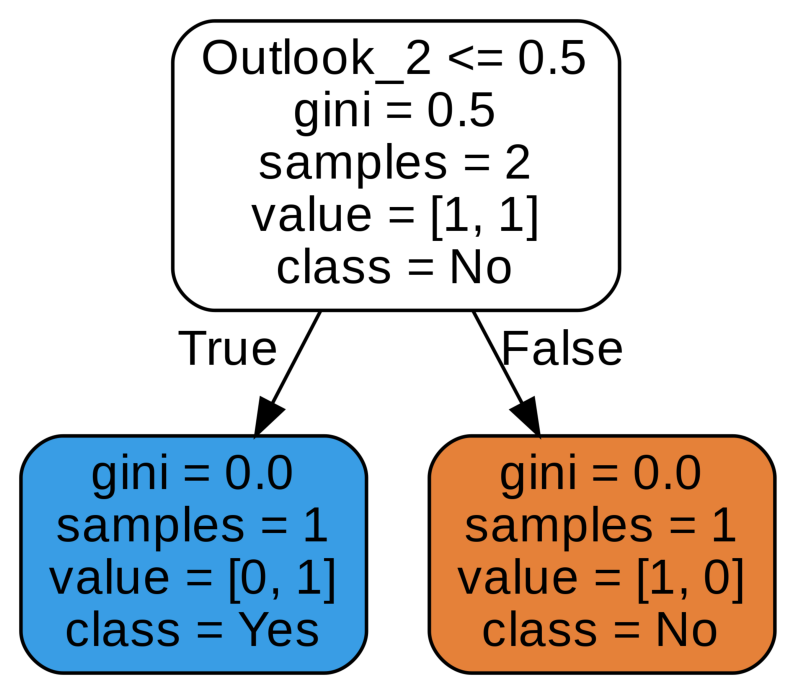

In [ ]:
from sklearn.tree import export_graphviz

feature_names=['Outlook_0','Outlook_1','Outlook_2','Temp_0','Temp_1','Temp_2','Wind_0','Wind_1','Humidity_0','Humidity_1']
export_graphviz(clf,out_file='weather_tree.dot',feature_names=feature_names,class_names=['No','Yes'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'weather_tree.dot', '-o', 'weather_tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('weather_tree.png'))
plt.axis('off')
plt.show()

In [24]:
#1).What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
test_data = [[0,1,0,0,0,1,0,1,1,0]]
output = clf.predict(test_data)
print(output)

['Yes']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [25]:
#2).What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity=’High’, and Wind = ’True’?
test_data = [[0,0,1,1,0,0,1,0,0,1]]
output = clf.predict(test_data)
print(output)

['No']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
